In [1]:
!pip install opencv-python
!pip install opencv-python-headless

     |████████████████████████████████| 60.9 MB 21.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 48.3 MB 25.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
from keras.applications.vgg16 import VGG16 as vgg16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from math import floor
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from numpy import expand_dims, array, exp, max
import json
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50 as resnet50
from tensorflow.keras.applications.vgg16 import VGG16 as vgg16
from tensorflow.keras.applications.inception_v3 import InceptionV3 as inception
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 as mobilenetv2
from tensorflow.keras.applications.densenet import DenseNet169 as densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy
from scipy import ndimage
import imageio
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import random

In [3]:
# set the model hyper parameters
BATCH_SIZE = 8
# set the image size to fit the resnet model for lower overfitting
IMG_SIZE = (224, 224)

In [4]:
#@train_df = pd.read_csv("files/test_correlation_above_glcm.csv")
#train_df2 = pd.read_csv("files/test_correlation_below_glcm.csv")

train_df = pd.read_csv("files/stanford/lbp/stanford_lbp_below.csv") #dkl
train_df2 = pd.read_csv("files/stanford/lbp/hellinger_stanford_lbp_below.csv")
train_df3 = pd.read_csv("files/stanford/lbp/jensen_stanford_lbp_below.csv")
train_df4 = pd.read_csv("files/stanford/lbp/wasserstein_stanford_lbp_below.csv")
train_df5 = pd.read_csv("files/stanford/lbp/bhattarchayya_stanford_lbp_below.csv")

In [5]:
print(train_df2)

                                              file                       label
0      n02108915-French_bulldog/n02108915_3880.jpg    n02108915-French_bulldog
1       n02108915-French_bulldog/n02108915_341.jpg    n02108915-French_bulldog
2      n02108915-French_bulldog/n02108915_2391.jpg    n02108915-French_bulldog
3     n02108915-French_bulldog/n02108915_11550.jpg    n02108915-French_bulldog
4      n02108915-French_bulldog/n02108915_2681.jpg    n02108915-French_bulldog
..                                             ...                         ...
824  n02113712-miniature_poodle/n02113712_3293.jpg  n02113712-miniature_poodle
825  n02113712-miniature_poodle/n02113712_3315.jpg  n02113712-miniature_poodle
826  n02113712-miniature_poodle/n02113712_9013.jpg  n02113712-miniature_poodle
827  n02113712-miniature_poodle/n02113712_1805.jpg  n02113712-miniature_poodle
828  n02113712-miniature_poodle/n02113712_3049.jpg  n02113712-miniature_poodle

[829 rows x 2 columns]


In [6]:
train_dataset_gen = ImageDataGenerator(rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.15, 
        brightness_range=[0.7, 1.4],
        vertical_flip=True,  
        horizontal_flip=True,
        rotation_range=15, 
        
        
        width_shift_range=0.1, 
        height_shift_range=0.1,
        validation_split=0.2,
        fill_mode='nearest')

In [7]:
training_dataset = train_dataset_gen.flow_from_dataframe(dataframe=train_df,
                                                         directory="StanfordDogs/Stanford_Dogs/Images",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset2 = train_dataset_gen.flow_from_dataframe(dataframe=train_df2,
                                                         directory="StanfordDogs/Stanford_Dogs/Images/",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset3 = train_dataset_gen.flow_from_dataframe(dataframe=train_df3,
                                                         directory="StanfordDogs/Stanford_Dogs/Images/",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset4 = train_dataset_gen.flow_from_dataframe(dataframe=train_df4,
                                                         directory="StanfordDogs/Stanford_Dogs/Images/",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset5 = train_dataset_gen.flow_from_dataframe(dataframe=train_df5,
                                                         directory="StanfordDogs/Stanford_Dogs/Images/",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")



Found 715 non-validated image filenames belonging to 10 classes.
Found 664 non-validated image filenames belonging to 10 classes.
Found 703 non-validated image filenames belonging to 10 classes.
Found 669 non-validated image filenames belonging to 10 classes.
Found 667 non-validated image filenames belonging to 10 classes.


In [8]:
model_name = vgg16
input_t =(224, 224, 3)
#model = tf.keras.applications.DenseNet169(weights = 'imagenet', include_top = False, input_shape = input_t)

model_t = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)

model_t2 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)

model_t3 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)

model_t4 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)

model_t5 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)


In [9]:
model_t.trainable = False
model_t2.trainable = False
model_t3.trainable = False
model_t4.trainable = False
model_t5.trainable = False

In [10]:
#finetune by removeing the last layer
#for layer in model_t.layers[:-2]:
    #layer.trainable = False

In [12]:
#model classifier topup
#reg=0.001

model = Sequential()
model.add(model_t)
model.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))


model2 = Sequential()
model2.add(model_t2)
model2.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(10, activation='softmax'))

model3 = Sequential()
model3.add(model_t3)
model3.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))

model3.add(layers.Dense(10, activation='softmax'))

model4 = Sequential()
model4.add(model_t4)
model4.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))

model4.add(layers.Dense(10, activation='softmax'))

model5 = Sequential()
model5.add(model_t5)
model5.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.5))

model5.add(layers.Dense(10, activation='softmax'))




In [13]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [14]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history = model.fit(training_dataset, batch_size=4, shuffle=True, epochs=150, verbose=1)

model2.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history2 = model2.fit(training_dataset2, batch_size=4, shuffle=True, epochs=150, verbose=1)

model3.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history3 = model3.fit(training_dataset2, batch_size=4, shuffle=True, epochs=150, verbose=1)

model4.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history4 = model4.fit(training_dataset2, batch_size=4, shuffle=True, epochs=150, verbose=1)

model5.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history5 = model5.fit(training_dataset2, batch_size=4, shuffle=True, epochs=150, verbose=1)



Epoch 1/150
90/90 [==============================] - 27s 261ms/step - loss: 2.7226 - accuracy: 0.1313 - precision: 0.1670 - recall: 0.0381
Epoch 2/150
90/90 [==============================] - 11s 123ms/step - loss: 2.0099 - accuracy: 0.3080 - precision: 0.4793 - recall: 0.1179
Epoch 3/150
90/90 [==============================] - 11s 123ms/step - loss: 1.7993 - accuracy: 0.3650 - precision: 0.5967 - recall: 0.1603
Epoch 4/150
90/90 [==============================] - 11s 124ms/step - loss: 1.6977 - accuracy: 0.3969 - precision: 0.6131 - recall: 0.1912
Epoch 5/150
90/90 [==============================] - 11s 127ms/step - loss: 1.6888 - accuracy: 0.4362 - precision: 0.5612 - recall: 0.1663
Epoch 6/150
90/90 [==============================] - 11s 124ms/step - loss: 1.6751 - accuracy: 0.4153 - precision: 0.5792 - recall: 0.1936
Epoch 7/150
90/90 [==============================] - 11s 122ms/step - loss: 1.6726 - accuracy: 0.4549 - precision: 0.6037 - recall: 0.2213
Epoch 8/150
90/90 [========

90/90 [==============================] - 11s 122ms/step - loss: 0.9000 - accuracy: 0.7245 - precision: 0.8571 - recall: 0.5263
Epoch 60/150
90/90 [==============================] - 11s 122ms/step - loss: 0.9208 - accuracy: 0.7058 - precision: 0.8592 - recall: 0.5122
Epoch 61/150
90/90 [==============================] - 11s 122ms/step - loss: 0.8612 - accuracy: 0.7345 - precision: 0.8530 - recall: 0.5004
Epoch 62/150
90/90 [==============================] - 11s 122ms/step - loss: 0.9295 - accuracy: 0.7044 - precision: 0.8355 - recall: 0.5069
Epoch 63/150
90/90 [==============================] - 11s 124ms/step - loss: 0.9849 - accuracy: 0.6876 - precision: 0.8099 - recall: 0.4745
Epoch 64/150
90/90 [==============================] - 11s 125ms/step - loss: 0.9589 - accuracy: 0.6916 - precision: 0.8576 - recall: 0.5168
Epoch 65/150
90/90 [==============================] - 11s 124ms/step - loss: 0.8803 - accuracy: 0.7281 - precision: 0.8266 - recall: 0.5310
Epoch 66/150
90/90 [=============

90/90 [==============================] - 11s 122ms/step - loss: 0.7665 - accuracy: 0.7611 - precision: 0.8888 - recall: 0.5854
Epoch 118/150
90/90 [==============================] - 11s 122ms/step - loss: 0.7386 - accuracy: 0.7734 - precision: 0.8789 - recall: 0.5954
Epoch 119/150
90/90 [==============================] - 11s 125ms/step - loss: 0.8605 - accuracy: 0.7236 - precision: 0.8400 - recall: 0.5424
Epoch 120/150
90/90 [==============================] - 11s 126ms/step - loss: 0.7511 - accuracy: 0.7573 - precision: 0.8748 - recall: 0.5846
Epoch 121/150
90/90 [==============================] - 11s 122ms/step - loss: 0.7982 - accuracy: 0.7488 - precision: 0.8457 - recall: 0.5699
Epoch 122/150
90/90 [==============================] - 11s 124ms/step - loss: 0.8245 - accuracy: 0.7151 - precision: 0.8488 - recall: 0.5202
Epoch 123/150
90/90 [==============================] - 11s 122ms/step - loss: 0.8579 - accuracy: 0.7058 - precision: 0.8486 - recall: 0.5354
Epoch 124/150
90/90 [======

83/83 [==============================] - 10s 123ms/step - loss: 1.0274 - accuracy: 0.6997 - precision: 0.8088 - recall: 0.4902
Epoch 26/150
83/83 [==============================] - 10s 126ms/step - loss: 1.1744 - accuracy: 0.6229 - precision: 0.8032 - recall: 0.4280
Epoch 27/150
83/83 [==============================] - 10s 124ms/step - loss: 1.0374 - accuracy: 0.6452 - precision: 0.8044 - recall: 0.4865
Epoch 28/150
83/83 [==============================] - 10s 124ms/step - loss: 1.0884 - accuracy: 0.6309 - precision: 0.7590 - recall: 0.4424
Epoch 29/150
83/83 [==============================] - 10s 122ms/step - loss: 1.0723 - accuracy: 0.6698 - precision: 0.8147 - recall: 0.4147
Epoch 30/150
83/83 [==============================] - 10s 123ms/step - loss: 0.9547 - accuracy: 0.6954 - precision: 0.8266 - recall: 0.5128
Epoch 31/150
83/83 [==============================] - 10s 122ms/step - loss: 1.0722 - accuracy: 0.6602 - precision: 0.7850 - recall: 0.4568
Epoch 32/150
83/83 [=============

83/83 [==============================] - 10s 121ms/step - loss: 0.8552 - accuracy: 0.7056 - precision: 0.8399 - recall: 0.5404
Epoch 84/150
83/83 [==============================] - 10s 125ms/step - loss: 0.8062 - accuracy: 0.7539 - precision: 0.8747 - recall: 0.5885
Epoch 85/150
83/83 [==============================] - 10s 126ms/step - loss: 0.8261 - accuracy: 0.7352 - precision: 0.8771 - recall: 0.5753
Epoch 86/150
83/83 [==============================] - 10s 122ms/step - loss: 0.7541 - accuracy: 0.7880 - precision: 0.9093 - recall: 0.5893
Epoch 87/150
83/83 [==============================] - 10s 122ms/step - loss: 0.8782 - accuracy: 0.7234 - precision: 0.8280 - recall: 0.5566
Epoch 88/150
83/83 [==============================] - 10s 124ms/step - loss: 0.8413 - accuracy: 0.7358 - precision: 0.8805 - recall: 0.5625
Epoch 89/150
83/83 [==============================] - 10s 125ms/step - loss: 0.9183 - accuracy: 0.7236 - precision: 0.8460 - recall: 0.5292
Epoch 90/150
83/83 [=============

83/83 [==============================] - 10s 124ms/step - loss: 0.7595 - accuracy: 0.7490 - precision: 0.8523 - recall: 0.5964
Epoch 142/150
83/83 [==============================] - 11s 129ms/step - loss: 0.7489 - accuracy: 0.7455 - precision: 0.8404 - recall: 0.5899
Epoch 143/150
83/83 [==============================] - 11s 130ms/step - loss: 0.7440 - accuracy: 0.7638 - precision: 0.8783 - recall: 0.5969
Epoch 144/150
83/83 [==============================] - 10s 125ms/step - loss: 0.8042 - accuracy: 0.7301 - precision: 0.8451 - recall: 0.5583
Epoch 145/150
83/83 [==============================] - 10s 125ms/step - loss: 0.8484 - accuracy: 0.7241 - precision: 0.8349 - recall: 0.5242
Epoch 146/150
83/83 [==============================] - 10s 126ms/step - loss: 0.8389 - accuracy: 0.7181 - precision: 0.8468 - recall: 0.5110
Epoch 147/150
83/83 [==============================] - 10s 125ms/step - loss: 0.7824 - accuracy: 0.7621 - precision: 0.8700 - recall: 0.5516
Epoch 148/150
83/83 [======

83/83 [==============================] - 11s 127ms/step - loss: 1.1197 - accuracy: 0.6504 - precision: 0.7961 - recall: 0.4045
Epoch 50/150
83/83 [==============================] - 11s 133ms/step - loss: 1.0598 - accuracy: 0.6832 - precision: 0.8325 - recall: 0.4141
Epoch 51/150
83/83 [==============================] - 11s 126ms/step - loss: 1.1051 - accuracy: 0.6436 - precision: 0.8236 - recall: 0.3799
Epoch 52/150
83/83 [==============================] - 10s 123ms/step - loss: 1.0077 - accuracy: 0.6655 - precision: 0.8226 - recall: 0.4396
Epoch 53/150
83/83 [==============================] - 10s 123ms/step - loss: 0.9924 - accuracy: 0.6581 - precision: 0.8436 - recall: 0.4398
Epoch 54/150
83/83 [==============================] - 10s 121ms/step - loss: 1.0348 - accuracy: 0.6820 - precision: 0.8266 - recall: 0.4294
Epoch 55/150
83/83 [==============================] - 11s 127ms/step - loss: 1.0816 - accuracy: 0.6428 - precision: 0.8130 - recall: 0.4418
Epoch 56/150
83/83 [=============

83/83 [==============================] - 10s 122ms/step - loss: 0.8488 - accuracy: 0.7092 - precision: 0.8733 - recall: 0.5236
Epoch 108/150
83/83 [==============================] - 10s 123ms/step - loss: 0.9072 - accuracy: 0.7285 - precision: 0.8693 - recall: 0.4992
Epoch 109/150
83/83 [==============================] - 10s 121ms/step - loss: 0.9529 - accuracy: 0.6946 - precision: 0.8399 - recall: 0.5072
Epoch 110/150
83/83 [==============================] - 10s 122ms/step - loss: 0.9279 - accuracy: 0.6761 - precision: 0.8136 - recall: 0.4915
Epoch 111/150
83/83 [==============================] - 11s 128ms/step - loss: 0.8801 - accuracy: 0.7180 - precision: 0.8724 - recall: 0.5289
Epoch 112/150
83/83 [==============================] - 10s 123ms/step - loss: 0.8968 - accuracy: 0.7175 - precision: 0.8810 - recall: 0.5555
Epoch 113/150
83/83 [==============================] - 10s 121ms/step - loss: 0.9203 - accuracy: 0.7154 - precision: 0.8612 - recall: 0.4910
Epoch 114/150
83/83 [======

83/83 [==============================] - 11s 127ms/step - loss: 1.3695 - accuracy: 0.5380 - precision: 0.7185 - recall: 0.3290
Epoch 16/150
83/83 [==============================] - 10s 125ms/step - loss: 1.3063 - accuracy: 0.5861 - precision: 0.7524 - recall: 0.3253
Epoch 17/150
83/83 [==============================] - 10s 122ms/step - loss: 1.4235 - accuracy: 0.5280 - precision: 0.7476 - recall: 0.3143
Epoch 18/150
83/83 [==============================] - 11s 127ms/step - loss: 1.1755 - accuracy: 0.6140 - precision: 0.8131 - recall: 0.4036
Epoch 19/150
83/83 [==============================] - 10s 125ms/step - loss: 1.3697 - accuracy: 0.5556 - precision: 0.7134 - recall: 0.3085
Epoch 20/150
83/83 [==============================] - 10s 124ms/step - loss: 1.1743 - accuracy: 0.6324 - precision: 0.8051 - recall: 0.4146
Epoch 21/150
83/83 [==============================] - 11s 128ms/step - loss: 1.2500 - accuracy: 0.6052 - precision: 0.7482 - recall: 0.3661
Epoch 22/150
83/83 [=============

83/83 [==============================] - 10s 123ms/step - loss: 0.8330 - accuracy: 0.7442 - precision: 0.8851 - recall: 0.5621
Epoch 74/150
83/83 [==============================] - 11s 126ms/step - loss: 0.7361 - accuracy: 0.8043 - precision: 0.9219 - recall: 0.5988
Epoch 75/150
83/83 [==============================] - 10s 123ms/step - loss: 0.7992 - accuracy: 0.7368 - precision: 0.8690 - recall: 0.5681
Epoch 76/150
83/83 [==============================] - 10s 122ms/step - loss: 0.8431 - accuracy: 0.7427 - precision: 0.8560 - recall: 0.5305
Epoch 77/150
83/83 [==============================] - 10s 123ms/step - loss: 0.8668 - accuracy: 0.7309 - precision: 0.8478 - recall: 0.5318
Epoch 78/150
83/83 [==============================] - 10s 122ms/step - loss: 0.8353 - accuracy: 0.7301 - precision: 0.8431 - recall: 0.5416
Epoch 79/150
83/83 [==============================] - 10s 124ms/step - loss: 0.8841 - accuracy: 0.7303 - precision: 0.8237 - recall: 0.5488
Epoch 80/150
83/83 [=============

83/83 [==============================] - 10s 123ms/step - loss: 0.8198 - accuracy: 0.7456 - precision: 0.8709 - recall: 0.5412
Epoch 132/150
83/83 [==============================] - 11s 126ms/step - loss: 0.8246 - accuracy: 0.7582 - precision: 0.8451 - recall: 0.5793
Epoch 133/150
83/83 [==============================] - 10s 125ms/step - loss: 0.8513 - accuracy: 0.7059 - precision: 0.8223 - recall: 0.5403
Epoch 134/150
83/83 [==============================] - 11s 131ms/step - loss: 0.7838 - accuracy: 0.7482 - precision: 0.9105 - recall: 0.5839
Epoch 135/150
83/83 [==============================] - 10s 121ms/step - loss: 0.7964 - accuracy: 0.7522 - precision: 0.8846 - recall: 0.5649
Epoch 136/150
83/83 [==============================] - 10s 123ms/step - loss: 0.7537 - accuracy: 0.7603 - precision: 0.8842 - recall: 0.5934
Epoch 137/150
83/83 [==============================] - 10s 123ms/step - loss: 0.8057 - accuracy: 0.7498 - precision: 0.8843 - recall: 0.5698
Epoch 138/150
83/83 [======

83/83 [==============================] - 10s 124ms/step - loss: 0.9991 - accuracy: 0.6853 - precision: 0.8409 - recall: 0.5006
Epoch 40/150
83/83 [==============================] - 10s 124ms/step - loss: 0.9051 - accuracy: 0.7142 - precision: 0.8280 - recall: 0.4966
Epoch 41/150
83/83 [==============================] - 11s 126ms/step - loss: 0.9637 - accuracy: 0.7081 - precision: 0.8325 - recall: 0.5184
Epoch 42/150
83/83 [==============================] - 10s 124ms/step - loss: 0.9688 - accuracy: 0.6921 - precision: 0.8307 - recall: 0.4991
Epoch 43/150
83/83 [==============================] - 10s 124ms/step - loss: 0.9136 - accuracy: 0.7180 - precision: 0.8631 - recall: 0.5369
Epoch 44/150
83/83 [==============================] - 10s 124ms/step - loss: 0.9366 - accuracy: 0.7064 - precision: 0.8549 - recall: 0.5404
Epoch 45/150
83/83 [==============================] - 10s 123ms/step - loss: 0.8996 - accuracy: 0.7255 - precision: 0.8636 - recall: 0.5138
Epoch 46/150
83/83 [=============

83/83 [==============================] - 10s 125ms/step - loss: 0.7250 - accuracy: 0.7605 - precision: 0.8584 - recall: 0.6443
Epoch 98/150
83/83 [==============================] - 10s 124ms/step - loss: 0.7364 - accuracy: 0.7491 - precision: 0.8483 - recall: 0.6128
Epoch 99/150
83/83 [==============================] - 10s 122ms/step - loss: 0.7411 - accuracy: 0.7344 - precision: 0.8728 - recall: 0.6352
Epoch 100/150
83/83 [==============================] - 10s 126ms/step - loss: 0.6823 - accuracy: 0.7935 - precision: 0.8652 - recall: 0.6737
Epoch 101/150
83/83 [==============================] - 10s 125ms/step - loss: 0.7016 - accuracy: 0.7577 - precision: 0.8625 - recall: 0.6234
Epoch 102/150
83/83 [==============================] - 10s 122ms/step - loss: 0.7826 - accuracy: 0.7629 - precision: 0.8570 - recall: 0.6325
Epoch 103/150
83/83 [==============================] - 10s 124ms/step - loss: 0.7223 - accuracy: 0.7551 - precision: 0.8330 - recall: 0.6164
Epoch 104/150
83/83 [========

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


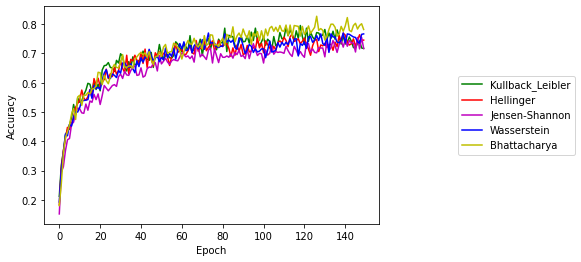

In [26]:
fig1 = plt.figure()


plt.plot(history2.history['accuracy'], color='g')
plt.plot(history.history['accuracy'], color='r')
plt.plot(history3.history['accuracy'], color='m')
plt.plot(history4.history['accuracy'], color='b')
plt.plot(history5.history['accuracy'], color='y')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Kullback_Leibler','Hellinger','Jensen-Shannon','Wasserstein','Bhattacharya'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('vgg16_lbp_all_accuracy_stanford.eps',  dpi=1000, format="eps", bbox_inches="tight") 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


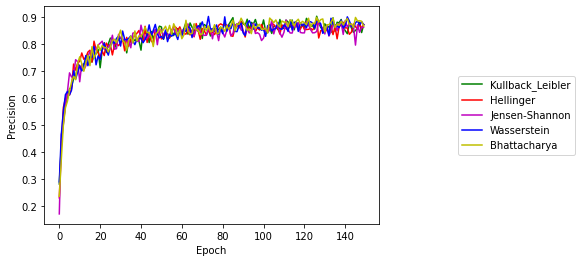

In [27]:
fig1 = plt.figure()


plt.plot(history2.history['precision'], color='g')
plt.plot(history.history['precision'], color='r')
plt.plot(history3.history['precision'], color='m')
plt.plot(history4.history['precision'], color='b')
plt.plot(history5.history['precision'], color='y')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Kullback_Leibler','Hellinger','Jensen-Shannon','Wasserstein','Bhattacharya'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('vgg16_lbp_all_precision_stanford.eps',  dpi=1000, format="eps", bbox_inches="tight") 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


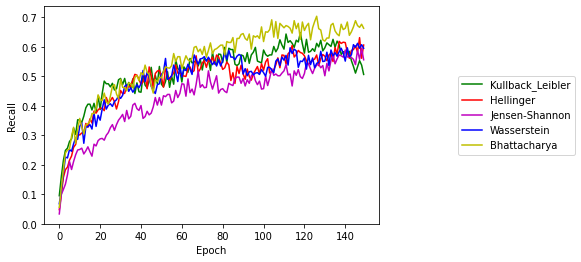

In [28]:
fig1 = plt.figure()

plt.plot(history2.history['recall'], color='g')
plt.plot(history.history['recall'], color='r')
plt.plot(history3.history['recall'], color='m')
plt.plot(history4.history['recall'], color='b')
plt.plot(history5.history['recall'], color='y')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Kullback_Leibler','Hellinger','Jensen-Shannon','Wasserstein','Bhattacharya'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('vgg16_lbp_all_recall_stanford.eps',  dpi=1000, format="eps", bbox_inches="tight") 
